# Understanding function evaluation in Hilbert Spaces

This idea was introduced in the lecture on Function Spaces and Hilbert Spaces. Frankly since I had never taken a class on this topic I was very confused, and the jump from standard dimensions to infinite dimensions was quite hard for me to grasp.

A lot of my intuition built up from previous classes made me think that we assign a value $f(x)$ for each $x$. However, this intuition does not carry over to function spaces such as $L^2[0,1]$ where pointwise evaluation is a non-continuous linear functional. I was expecially confused about the idea that what we call functions in $L^2$ are really equivalence classes, and not the pointwise functions I was used to from previous classes etc.

It felt like a paradox, how can we talk about function spaces where value at a point may not be defined. So, this notebook will begin by explaining most of the basics covered in this lecture, that we will then use to show a common counter example to help build an understanding of how to interpret infinite dimensional space.

# What is $L^2[0,1]$

To understand why the continuity of point evaluation fails, first we must understand the space we are working in:

$L^2[0,1]$ is the space of square-integrable functions on the interval $[0,1]$. A function $f$ belongs in this space if

$$\int_0^1 |f(x) |^2  dx <\infty $$

Also, importantly this space has a notion of "size" - related to the $L^2$ norm we studied previously.

Thus, $\|f\|_{L^2} = \sqrt{\int_0^1 |f(x)|^2  dx}$. Intuitively this norm measures the "average magnitude" of the function over the whole interval as it is an integral and aggregates behavior across the entire domain, not at any single point.

Also, note that two functions are "close" in $L^2$ if $\|f - g\|_{L^2}$ is small. This is very different from being close pointwise as it is an aggregate over the domain, which is a key detail that I didn't fully grasp at first.

# Understanding the Evaluation Functional

The first time I heard about the evaluation functional it seemed pretty abstract but this is simply a map from
the vector space to its scalars (essentially it evaluates functions at a point $x$).

$$\delta_x : H \to \mathbb{R}, \quad \delta_x(f) = f(x)$$

Note that it is linear because $\delta_x(af + bg) = af(x) + bg(x) = a\delta_x(f) + b\delta_x(g)$.



# Understanding continuity

The final piece to understand before we reach the counter example is what continuity means for a function.

Note above the evaluation functional is linear, thus for a linear function $L: H \to \mathbb{R}$, we can imagine continuity as 
 **boundedness**. Essentially we want to know if there exists some constant $C$ such that: $|L(f)| \leq C \|f\|$ for all $f$ in our space.

In other words, if we know the size of a function's $L^2$ norm then we should know something about how big $f(x)$ can possibly be. i.e. if we can bound the average size we can bound the value at a point


For the evaluation functional $\delta_x$ to be continuous, we would need: $|f(x)| \leq C \|f\|_{L^2}$ and for some fixed constant $C$ and all functions $f$. However, this is what fails in $L^2$

# Counterexample: Spike Function

Let me give the example shown in the class notes. Let us Define the spike function $f_n$ centered at $x = 0.5$:

$$f_n(x) = \begin{cases} \sqrt{n} & \text{if } x \in \left[0.5 - \frac{1}{2n}, 0.5 + \frac{1}{2n}\right] \\ 0 & \text{otherwise} \end{cases}$$

Let's compute its $L^2$ norm:

$$\|f_n\|_{L^2}^2 = \int_0^1 f_n(x)^2 \, dx = (\sqrt{n})^2 \cdot \frac{1}{n} = n \cdot \frac{1}{n} = 1$$

So $\|f_n\|_{L^2} = 1$ for all $n$.

But the value at $x = 0.5$ is $f_n(0.5) = \sqrt{n} \to \infty$

Thus clearly the evaluation functional $\delta_{0.5}$ is discontinuous so lets look at a visual example so it makes more sense:


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def spike_function(x, n):
    half_width = 1 / (2* n)
    return np.where((x >= 0.5 - half_width) & (x <= 0.5 + half_width), np.sqrt(n), 0.0)



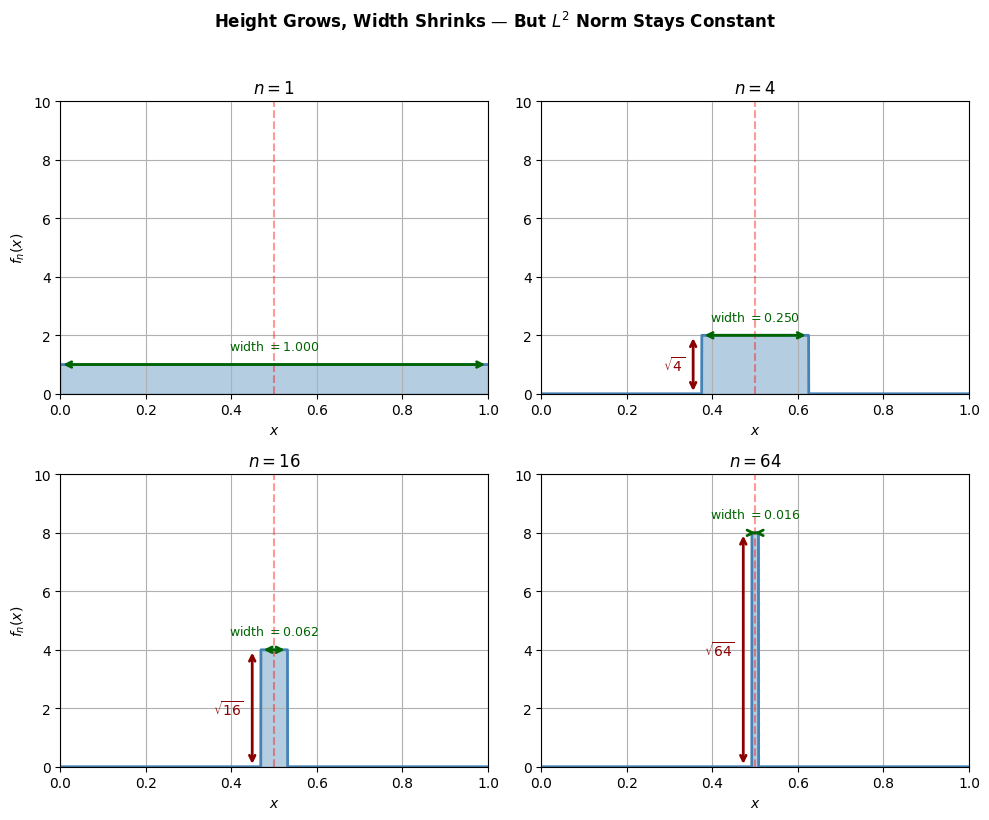

In [38]:
x = np.linspace(0, 1, 5000)
n_values = [1, 4, 16, 64]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for ax, n in zip(axes, n_values):
    y = spike_function(x, n)
    height = np.sqrt(n)
    width = 1/n
    
    ax.fill_between(x, y, alpha=0.4, color='steelblue')
    ax.plot(x, y, linewidth=2, color='steelblue')
    ax.axvline(x=0.5, color='red', linestyle='--', alpha=0.4)
    
    ax.annotate('', xy=(0.5 + width/2, height), xytext=(0.5 - width/2, height),
                arrowprops=dict(arrowstyle='<->', color='darkgreen', lw=2))
    ax.text(0.5, height + 0.5, f'width $= {width:.3f}$', ha='center', fontsize=9, color='darkgreen')
    
    if n > 1:
        ax.annotate('', xy=(0.5 - width/2 - 0.02, height), xytext=(0.5 - width/2 - 0.02, 0),
                    arrowprops=dict(arrowstyle='<->', color='darkred', lw=2))
        ax.text(0.5 - width/2 - 0.04, height/2, f'$\\sqrt{{{n}}}$', ha='right', fontsize=10, color='darkred', va='center')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 10)
    ax.set_xlabel('$x$')
    ax.set_title(f'$n = {n}$', fontsize=12)

axes[0].set_ylabel('$f_n(x)$')
axes[2].set_ylabel('$f_n(x)$')
plt.suptitle('Height Grows, Width Shrinks — But $L^2$ Norm Stays Constant', fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

The key observation is that as $n$ increases, the spike gets taller (height is $\sqrt{n}$) but also narrower (width is $1/n$). These two effects exactly cancel out in the integral, keeping the $L^2$ norm constant at 1. 
Let's verify this numerically and see the contradiction more clearly:

In [39]:
print("The Contradiction: Bounded Norm, Unbounded Point Value\n")
print(f"{'n':<12}{'||f_n||_L²':<15}{'f_n(0.5)':<15}")
print("-" * 40)

for n in [1, 4, 16, 64, 256, 1024, 10000, 1000000]:
    l2_norm = 1.0 # (we set to 1 as python float errors give small mistakes)
    value_at_half = np.sqrt(n)
    print(f"{n:<12}{l2_norm:<15.4f}{value_at_half:<15.2f}")

print("-" * 40)


The Contradiction: Bounded Norm, Unbounded Point Value

n           ||f_n||_L²     f_n(0.5)       
----------------------------------------
1           1.0000         1.00           
4           1.0000         2.00           
16          1.0000         4.00           
64          1.0000         8.00           
256         1.0000         16.00          
1024        1.0000         32.00          
10000       1.0000         100.00         
1000000     1.0000         1000.00        
----------------------------------------


This table shows the problem clearly: we have a sequence of functions with **constant** $L^2$ norm, but **unbounded** point evaluation. 

Therefore, no constant $C$ can satisfy $|f_n(0.5)| \leq C \|f_n\|_{L^2} = C$ for all $n$. The evaluation functional $\delta_{0.5}$ is discontinuous.

# Why this matters

The discontinuity of evaluation has a concrete consequence via the **Riesz Representation Theorem**:

For any continuous linear functional $L$ on a Hilbert space $H$, there exists a unique element $u_L \in H$ such that $L(f) = \langle f, u_L \rangle$ for all $f$.

If evaluation $\delta_x$ were continuous, there would exist a "representer" $k_x$ such that:
$f(x) = \langle f, k_x \rangle$
This would be incredibly useful — we could compute point evaluations via inner products. But since $\delta_x$ is *not* continuous in $L^2$, no such representer exists in that space. For ML this is a huge problem as we are constantly evaluating losses (e.g. $l(f(x_i),y_i)$), thus we need a space where point evaluation is defined.


Only after understand everything above, it finally made sense why we study the **Reproducing Kernel Hilbert Spaces (RKHS)** as they are specifically constructed to be spaces where evaluation is continuous, and hence representers do exist.


# Why I was confused and why it makes sense now 

At first I was very confused because I kept trying to understand point evaluation in $L^2$ using previous intuition where the value of a function at a point is trivial. The idea that a function could have a small norm but an arbitrarily large value at a point made no sense.

I think the most important part I had to understand was that the $L^2$ norm controls the average of the function, not any extreme values. Seeing the graphs where you see the spike increase while the norm stays constant also definitely helped.

After understanding this, it became clear why we need RKHS and the rest of the content on this began to make more sense too.